<a href="https://colab.research.google.com/github/ismailerbas/Projects-in-Machine-Learning-and-AI/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1


In my master's, I worked in Tactile Research Lab. at Bogazici University, Turkey. In this lab, we were training rats to push buttons and complete a task for discrimination of vibrotactile feedback. There were three buttons and three LEDs on top of them. The task was simple, first, rat had to push the middle button and start the task, then the rat was expected to push the left button if there were no stimuli and push the right button when there was a stimulus presented. The process is shown in the figure below. When a new rat comes in we were training the rat by following the MDP. We were giving the rat water as an award and a noise for the punishment.  First, we were putting the rat in the chamber, and the rat didn't know anything. To teach the rat to push the buttons, we were giving an award when the rat was near the button, then when it was on the button, then when it was pushing the button. When it was getting further from the buttons, we were giving punishment. After getting used to the system, we were giving the awards and punishments automatically using the strategy in the figure below. Which was based on MDP.


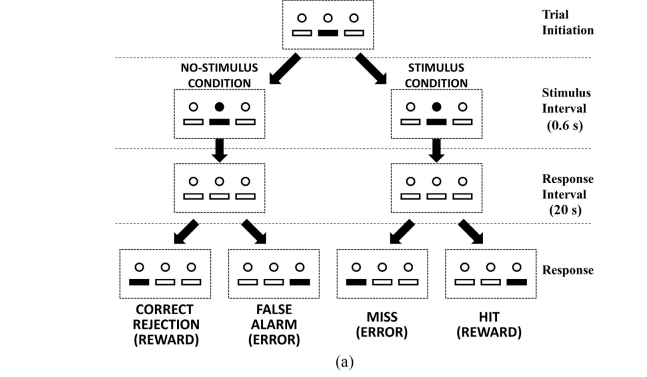

[1] Devecioğlu, İsmail, and Burak Güçlü. "Psychophysical correspondence between vibrotactile intensity and intracortical microstimulation for tactile neuroprostheses in rats." Journal of neural engineering 14.1 (2016): 016010.

Task 2

While we are more likely to come across supervised and unsupervised learning, which are sub-branches of machine learning, in our daily lives, reinforcement learning is a type of machine learning that has just entered our lives. While its discovery dates back to 1989, it is less known than other types of machine learning because its usage area is limited today. One use of reinforcement learning is in healthcare. RL addresses sequential decision problems, making it a viable candidate for developing robust solutions in healthcare practice, where long and sequential procedures characterize treatment regimes or diagnostic decisions. The RL can effectively find treatment regimes and dynamically adapt to the changing clinical states. This helps with the long-term care of the patients. RL can be used to calculate the drug dosage; it can decide the treatment type. RL can also help with long-term treatment and monitor chronic diseases such as diabetes, cancer, and HIV. Long-term monitoring of the treatment's effects, changes in the patient's health status and duration, and medicine dosage are crucial. RL can facilitate the decision-making process and ease the life of the patients [1, 2]. RL is also used to navigate the endoscopic robots in the intestines. RL will help automate the process and control the camera to record more areas, so the surgeon can analyze the recordings and find issues more efficiently [3-5]. One study [3] used RL to automatically navigate a prototype robot through the intestine. RL determined the robot's speed and direction, adjusting the input voltages. The robot was made of two parts, the front part turned clockwise rotation, and the rear part turned anti-clockwise. By controlling both of them, the robot could move in all directions. They used the torque information to get the states of the robot. There were five states which were the movements of the robots. They defined five actions which were voltage values for the forward and backward movement. They defined waypoints in the intestine for the rewards, and their punishment was given if the robot was stuck. They used Q learning and used alpha value decrease from 0.3 with each attempt. They first tried the robot in a short intestine and checked the damage done by that robot. After examining the damage, they concluded that the robot didn't damage the colon. After the experiments, they saw that robot successfully navigated in the colon if there were no bent areas. The robot was getting stuck in the bent areas and could not improve passing the bent areas. However, the robot was able to navigate through the straight colon without any problem and with adequate speed. I think this study is promising, and they can solve the issue with bent areas by training the robot in the simulation. Using simulation could help them generate more scenarios and allow the model to learn about different situations.  

1.	Zhao, Y., M.R. Kosorok, and D. Zeng, Reinforcement learning design for cancer clinical trials. Stat Med, 2009. 28(26): p. 3294-315.
2.	Chakraborty, B. and E. Moodie, Statistical methods for dynamic treatment regimes. Springer-Verlag. doi, 2013. 10: p. 978-1.
3.	Trovato, G., et al., Development of a colon endoscope robot that adjusts its locomotion through the use of reinforcement learning. International journal of computer assisted radiology and surgery, 2010. 5(4): p. 317-325.
4.	Turan, M., et al., Learning to navigate endoscopic capsule robots. IEEE Robotics and Automation Letters, 2019. 4(3): p. 3075-3082.
5.	Agrawal, A.S., Automating endoscopic camera motion for teleoperated minimally invasive surgery using inverse reinforcement learning. Master's thesis, 2018.



Task 3

Here we will use q learning to play tic-tac-toe game. I used following link to implement q learning and defining the game :  https://www.kaggle.com/code/prabhakarkalaiselvan/tic-tac-toe-reinforcement-learning

In [16]:
# importing libraries
from abc import ABC, abstractmethod
from collections import defaultdict
import enum
import numpy as np
import pandas as pd

In [17]:
EMPTY = '-' # we will define here the empty spaces and marks of the players.
PLAYER_X = 'X'
PLAYER_O = 'O'

In [18]:
class GameStatus(enum.Enum): # This is where we define the game status so the machine can understand the situation more easily
    WON = 1
    DRAWN = 2
    INPROGRESS = 3

In [19]:
class TicTacToe(object): # Here we will define the game 
    """
    Tic Tac Toe board
    """
    def __init__(self, player_x, player_o, first_player = None): # if we want to use the game we have to define both players and we can define who plays first
        self.board = np.full((3,3), EMPTY) # We define the board here it will be 3x3 board as in usual tictactoe game, but we can change it however we want 
        self.player_x = player_x # this is the first player that plays X
        self.player_o = player_o # this is the second player that plays O
        if first_player is None:
            self.player_turn = self.toss()
        else:
            self.player_turn = first_player
        self.first_player = self.player_turn
        
    def reset_board(self): # after each game we reset the board for a fresh start
        self.board = np.full((3,3), EMPTY)
        
    def toss(self): # we define randomly who is going to play first
        return np.random.choice([PLAYER_X, PLAYER_O])
        
    def move(self, action): # We define here the turns of the players
        self.board[action[0]][action[1]] = self.player_turn
        if self.player_turn == PLAYER_X:
            self.player_turn = PLAYER_O
        else:
            self.player_turn = PLAYER_X
        return self.status(), self.board
    
    def status(self): # here we define the wins and draw to end the game so that the game ends. We have to check rows colums and diagonal to see if there is a match.
        # check for win along rows
        for i in range(self.board.shape[0]):
            if EMPTY not in self.board[i, :] and len(set(self.board[i, :])) == 1:
                return GameStatus.WON
        # check for win along columns
        for j in range(self.board.shape[1]):
            if EMPTY not in self.board[:, j] and len(set(self.board[:, j])) == 1:
                return GameStatus.WON
        # check for win along diagonals
        if EMPTY not in np.diag(self.board) and len(set(np.diag(self.board)))==1:
            return GameStatus.WON
        if EMPTY not in np.diag(np.fliplr(self.board)) and len(set(np.diag(np.fliplr(self.board))))==1:
            return GameStatus.WON
        # check for a Draw
        if not EMPTY in self.board:
            return GameStatus.DRAWN
        else:
            return GameStatus.INPROGRESS

    def print_board(self):        # for some visualization we define a function to print the board and the game
        print('    0   1   2\n')
        for i, row in enumerate(self.board):
            print('%i   ' % i, end='')
            for elt in row:
                print('%s   ' % elt, end='')
            print('\n')

In [65]:
class Agent(ABC): # Here we define the q learning agents 
    """
    Base class of RL agents - Q-learning
    """
    def __init__(self, alpha, gamma, epsilon, epsilon_decay): # we will define the learning rate and all other values here according to the input
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        
        # This is where we define all possible actions there is 
        self.actions = [(i, j) for i in range(3) for j in range(3)]
        # we will initiliaze Q-table using the actions we defined
        self.Q = {action: defaultdict(int) for action in self.actions}
        # Here we define the reward
        self.R = []
    
    def get_available_actions(self, state): # Here we will get available actions so that the agent won't have to calculate already played actions
        return [action for action in self.actions if state[action[0]*3 + action[1]] == EMPTY] 
        
    
    def sample_next_action(self, state): # Here we will define the next action using available actions 
        available_actions = self.get_available_actions(state)
        if np.random.random() < self.epsilon:
            if len(available_actions) == 1: # If we have one last action which is last space available the game automatically fills the space with next player's mark
                next_action = available_actions[0]
            else:
                next_action = available_actions[np.random.randint(0, len(available_actions)-1)] # If there are more than one action the game takes a random action
        else:
            q_values_for_actions = np.array([self.Q[action][state] for action in available_actions]) # the agent gets q values for the actions to decide wich action to make 
            max_index = np.where(q_values_for_actions == np.max(q_values_for_actions))[0]
            if(len(max_index) > 1):
                max_index = int(np.random.choice(max_index, size = 1))
            else:
                max_index = int(max_index)
            next_action = available_actions[max_index]
            print(max_index)
        # we update the epsilon here 
        self.epsilon *= (1.-self.epsilon_decay)
        return next_action  
        
    @abstractmethod
    def update(self, curr_state, next_state, curr_action, next_action, reward):
        pass

In [67]:
class QlearningAgent(Agent): # Here we define the q learning agent using the agent class we defined above, the agent will calculate the q table and decide the next move to beat the game
    """
    Q-Learning Agent
    """
    def __init__(self, alpha, gamma, epsilon, epsilon_decay=0.):
        super().__init__(alpha, gamma, epsilon, epsilon_decay)
        
    def update(self, curr_state, next_state, curr_action, next_action, reward):
        """
        Function to update the Q-table using Q-learning method
        
        next_action will not be used by Q-learning
        """
        if next_state is not None:
            available_actions = self.get_available_actions(next_state)
           
            Q_values = [self.Q[action][next_state] for action in available_actions]
            self.Q[curr_action][curr_state] += self.alpha * (reward + self.gamma * max(Q_values) - self.Q[curr_action][curr_state])
        else:
            self.Q[curr_action][curr_state] += self.alpha * (reward - self.Q[curr_action][curr_state])
        self.R.append(reward)

In [22]:
alpha = 0.5 # Here we will define necessary values 
gamma = 0.9
epsilon = 0.1

game_results_df = pd.DataFrame(columns=['MATCH_ID', 'WINNER', 'TOSS'])

In [23]:
def add_game_results(match_id, winner, toss): # Here we save the game results to measure the agent's success
    """
    Function to record the results of at the end of each game
    """
    global game_results_df
    
    game_results_df.loc[game_results_df.shape[0]] = [match_id, winner, toss]

In [24]:
def state_to_string(board):
    # Here we convert the board to string so that the computer can understand
    key = ''
    for row in board:
        for elt in row:
            key += elt
    return key

In [25]:
def play(game, match_id):
    # This is where we the game is defined, the game will continue to play until either player wins or there is a draw in the game
    while(1):
        player_turn = game.player_turn
        curr_state = state_to_string(game.board)
        if player_turn == PLAYER_X:
            curr_action = game.player_x.sample_next_action(curr_state)
        elif player_turn == PLAYER_O:
            curr_action = game.player_o.sample_next_action(curr_state)
        game.move(curr_action)
        
        # Here we will check the status of the game and save the results if the game is over
        if game.status() == GameStatus.WON:
            if player_turn == PLAYER_X:
                game.player_x.update(curr_state, None, curr_action, None, 1)
                game.player_o.update(curr_state, None, curr_action, None, -1)
            else:
                game.player_o.update(curr_state, None, curr_action, None, 1)
                game.player_x.update(curr_state, None, curr_action, None, -1)
            add_game_results(match_id, player_turn, game.first_player)
            break
        elif game.status() == GameStatus.DRAWN:
            game.player_x.update(curr_state, None, curr_action, None, 0)
            game.player_o.update(curr_state, None, curr_action, None, 0)
            add_game_results(match_id, EMPTY, game.first_player)
            break
        # here we will change game state to string and players will take the actions 
        new_state = state_to_string(game.board) 
        if player_turn == PLAYER_X:
            new_action = game.player_x.sample_next_action(new_state)
            game.player_x.update(curr_state, new_state, curr_action, new_action, 0)
        elif player_turn == PLAYER_O:
            new_action = game.player_o.sample_next_action(new_state)
            game.player_o.update(curr_state, new_state, curr_action, new_action, 0)

In [51]:
#This is where we play defined number of games and save the results
def learn(game, num):
    global game_results_df
    
    game_results_df = pd.DataFrame(columns=['MATCH_ID', 'WINNER', 'TOSS'])
    games_played = 0

    while(games_played < num):
        play(game, games_played)
        games_played += 1
        game.print_board() # We will print the board to display and reset it after each game
        print(games_played)
        game.reset_board()  

In [27]:
def display_win_trend(df): # Here we will display the trend as evaluation metric and see how the agent learns
    num_of_games_played = df['MATCH_ID'][df.shape[0]-1]
    bins = np.arange(1, num_of_games_played/1000) * 1000
    df['BINS'] = np.digitize(df['MATCH_ID'], bins, right=True)
    counts = df.groupby(['BINS', 'WINNER']).MATCH_ID.count().unstack()
    ax=counts.plot(kind='bar', stacked=True, figsize=(17,5))
    ax.set_xlabel("Number of Games Played in Bins of 1000")
    ax.set_ylabel("Counts of X Win / O Win / Draw")

Streaming output truncated to the last 5000 lines.
    0   1   2

0   O   O   O   

1   -   X   X   

2   -   X   -   

    0   1   2

0   O   X   -   

1   -   X   -   

2   -   X   O   

    0   1   2

0   -   -   X   

1   -   X   O   

2   X   O   O   

    0   1   2

0   -   X   X   

1   O   O   O   

2   O   -   X   

    0   1   2

0   -   -   O   

1   X   X   O   

2   -   X   O   

    0   1   2

0   -   X   O   

1   -   X   O   

2   -   X   -   

    0   1   2

0   -   O   X   

1   -   O   X   

2   -   O   -   

    0   1   2

0   O   X   X   

1   -   O   -   

2   X   -   O   

    0   1   2

0   O   X   X   

1   X   X   O   

2   X   O   O   

    0   1   2

0   -   -   X   

1   -   X   O   

2   X   O   O   

    0   1   2

0   O   O   X   

1   X   O   X   

2   -   O   -   

    0   1   2

0   -   O   X   

1   -   O   X   

2   O   X   X   

    0   1   2

0   O   O   O   

1   -   X   X   

2   -   -   -   

    0   1   2

0   -   X   O   

1   -   X   O   

2

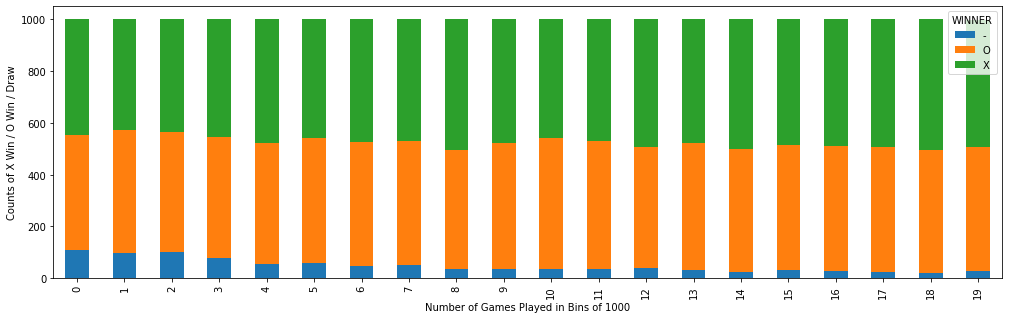

In [38]:
player_o = QlearningAgent(alpha, gamma, epsilon) #We will define the players to be q learning agents and we will see how they play and learn by playing each other
player_x = QlearningAgent(alpha, gamma, epsilon)
game = TicTacToe(player_x, player_o)
learn(game, 20000) # They will play 20000 games and the agent will train during this game
display_win_trend(game_results_df)

In [39]:
game_results_df

,MATCH_ID,WINNER,TOSS,BINS
0,0,O,O,0
1,1,O,O,0
2,2,X,O,0
3,3,X,O,0
4,4,O,O,0
...,...,...,...,...
19995,19995,X,O,19
19996,19996,O,O,19
19997,19997,O,O,19
19998,19998,O,O,19


In [40]:
playerx=0
playery=0
id=game_results_df["MATCH_ID"]
results=game_results_df["WINNER"]
for i in range(len(game_results_df["WINNER"])):
  if results[i]=="X":
    playerx=playerx+1
  elif results[i]=="O":
    playery=playery+1
print(playerx)
print(playery)

9499
9539


We can see here that at first because the agents did not know how to play the game they were making random moves. Therefore the amount of wins for both of the players were equal and the probability of draw is more. After some time the players start to learn how to play the game and we can see the draw gets lower and lower. We can see that player O wins slightly more than player x. This is understandable because it usually starts first. And starting first in this game is advantageous. At the end it is closer to 50% 50% percents for each player because they were both learning the game. Next we can use one of the experienced players and see how a begginer player will perform againts it. 




Streaming output truncated to the last 5000 lines.
    0   1   2

0   X   O   O   

1   X   X   O   

2   O   -   X   

    0   1   2

0   -   -   -   

1   O   O   O   

2   -   X   X   

    0   1   2

0   X   X   O   

1   -   O   X   

2   O   X   O   

    0   1   2

0   O   X   O   

1   -   O   X   

2   X   X   O   

    0   1   2

0   X   O   -   

1   -   X   -   

2   -   O   X   

    0   1   2

0   -   O   O   

1   X   X   X   

2   -   -   O   

    0   1   2

0   X   -   -   

1   O   X   O   

2   O   -   X   

    0   1   2

0   -   -   -   

1   O   O   O   

2   X   X   -   

    0   1   2

0   O   X   -   

1   X   O   X   

2   -   -   O   

    0   1   2

0   -   O   X   

1   -   X   -   

2   X   -   O   

    0   1   2

0   X   X   X   

1   O   -   O   

2   -   O   -   

    0   1   2

0   O   O   O   

1   -   -   -   

2   X   X   -   

    0   1   2

0   X   X   X   

1   O   -   O   

2   -   -   -   

    0   1   2

0   -   X   X   

1   -   -   -   

2

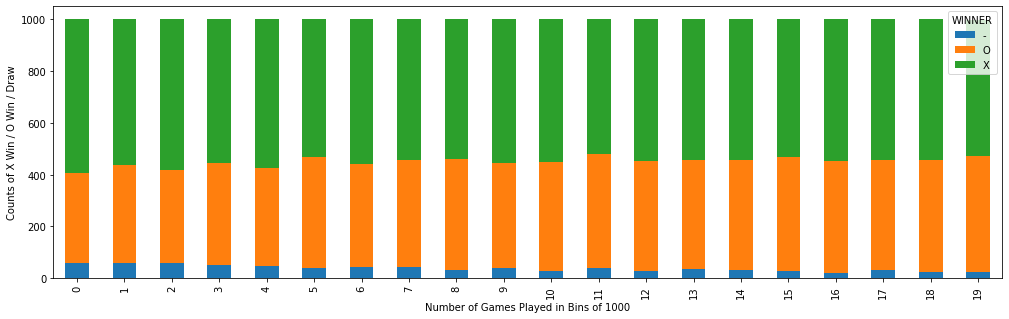

In [41]:
player_o = QlearningAgent(alpha, gamma, epsilon) # player o will be the new rookie player and play against the player that is more experienced
game = TicTacToe(player_x, player_o, PLAYER_O)
learn(game, 20000)
display_win_trend(game_results_df)

In [42]:
game_results_df

,MATCH_ID,WINNER,TOSS,BINS
0,0,X,O,0
1,1,X,O,0
2,2,-,O,0
3,3,X,O,0
4,4,O,O,0
...,...,...,...,...
19995,19995,X,O,19
19996,19996,O,O,19
19997,19997,X,O,19
19998,19998,O,O,19


In [43]:
playerx=0
playery=0
id=game_results_df["MATCH_ID"]
results=game_results_df["WINNER"]
for i in range(len(game_results_df["WINNER"])):
  if results[i]=="X":
    playerx=playerx+1
  elif results[i]=="O":
    playery=playery+1
print(playerx)
print(playery)

10998
8249


We can see that our experienced player won the majority of the games eventhough new player was starting first. As the new player learns the game it started to make the odds equal and win the games. Because we have one experienced player the amount of draw is not as much as first training. This is the power of reinforcement learning. The players will not know anything at the beginning and start to learn by their experiences. Let's see what would happen when the experienced player always starts first so the new player won't have the advantage. 

Streaming output truncated to the last 5000 lines.
    0   1   2

0   -   X   -   

1   O   O   O   

2   X   -   X   

    0   1   2

0   -   -   X   

1   O   X   -   

2   X   -   O   

    0   1   2

0   -   -   X   

1   O   X   O   

2   X   -   O   

    0   1   2

0   O   -   O   

1   X   X   X   

2   O   -   -   

    0   1   2

0   -   X   X   

1   -   -   -   

2   O   O   O   

    0   1   2

0   X   X   X   

1   -   O   O   

2   -   -   -   

    0   1   2

0   X   X   O   

1   -   O   -   

2   O   -   -   

    0   1   2

0   X   O   X   

1   O   O   X   

2   X   X   O   

    0   1   2

0   X   O   -   

1   X   O   -   

2   X   -   O   

    0   1   2

0   -   O   X   

1   -   O   X   

2   -   O   -   

    0   1   2

0   O   -   X   

1   -   -   X   

2   O   -   X   

    0   1   2

0   O   X   -   

1   -   O   -   

2   -   X   O   

    0   1   2

0   X   X   O   

1   O   X   O   

2   -   X   -   

    0   1   2

0   O   -   O   

1   X   X   X   

2

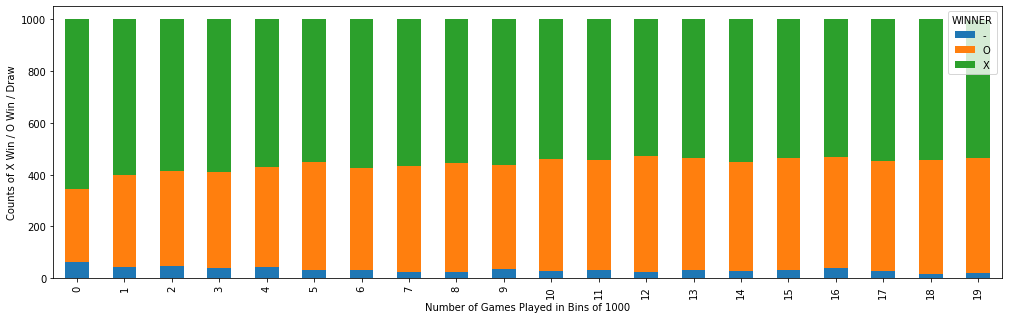

In [44]:
player_o = QlearningAgent(alpha, gamma, epsilon) # player o will be the new rookie player and play against the player that is more experienced
game = TicTacToe(player_x, player_o, PLAYER_X)
learn(game, 20000)
display_win_trend(game_results_df)

In [45]:
game_results_df

,MATCH_ID,WINNER,TOSS,BINS
0,0,O,X,0
1,1,O,X,0
2,2,X,X,0
3,3,O,X,0
4,4,X,X,0
...,...,...,...,...
19995,19995,X,X,19
19996,19996,X,X,19
19997,19997,X,X,19
19998,19998,X,X,19


In [46]:
playerx=0
playery=0
id=game_results_df["MATCH_ID"]
results=game_results_df["WINNER"]
for i in range(len(game_results_df["WINNER"])):
  if results[i]=="X":
    playerx=playerx+1
  elif results[i]=="O":
    playery=playery+1
print(playerx)
print(playery)

11206
8142


We can see that when experienced player starts first it wins more but it is not that significant. That might be because the game is not that complicated and the players can learn fast so that disadvantage disappears after some time.